In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [99]:
#Loading the data
file = pd.read_csv('student.csv')
df = pd.DataFrame(file)

In [100]:
#Inspection
print(df.head())

   study_hours  attendance  previous_score  pass_fail
0            2          80              62          0
1            2          78              33          0
2            6          87              97          1
3            1          60              45          0
4            3          42              30          0


In [101]:
print(df.tail())

     study_hours  attendance  previous_score  pass_fail
995            2          79              70          1
996            6          90              87          1
997            4          94              40          1
998            0          43              97          0
999            5          49              99          1


In [102]:
print(df.describe())

       study_hours   attendance  previous_score    pass_fail
count  1000.000000  1000.000000     1000.000000  1000.000000
mean      4.897000    70.281000       59.379000     0.673000
std       3.125726    18.091969       23.484013     0.469352
min       0.000000    40.000000       20.000000     0.000000
25%       2.000000    55.000000       39.000000     0.000000
50%       5.000000    69.000000       59.000000     1.000000
75%       7.000000    87.000000       80.000000     1.000000
max      10.000000   100.000000      100.000000     1.000000


In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   study_hours     1000 non-null   int64
 1   attendance      1000 non-null   int64
 2   previous_score  1000 non-null   int64
 3   pass_fail       1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB
None


In [104]:
#Checking for null values
print(df.isnull().sum())

study_hours       0
attendance        0
previous_score    0
pass_fail         0
dtype: int64


In [105]:
#Introducing 10% missing values in attendance and study_hours
np.random.seed(42)
attendance_missing = df.sample(frac=0.10).index
study_hours_missing = df.sample(frac=0.10).index

df.loc[attendance_missing, "attendance"] = np.nan
df.loc[study_hours_missing, "study_hours"] = np.nan

df.to_csv("dataset_missing_values.csv", index = False)
df.head()

,study_hours,attendance,previous_score,pass_fail
0,2.0,80.0,62,0
1,2.0,78.0,33,0
2,6.0,87.0,97,1
3,1.0,60.0,45,0
4,3.0,42.0,30,0


In [106]:
#Checking for null values
print(df.isnull().sum())

study_hours       100
attendance        100
previous_score      0
pass_fail           0
dtype: int64


In [107]:
#Handling Missing Values
columns = df.select_dtypes(include=np.number).columns
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)

df.to_csv("Student_Performance_Prediction.csv", index=False)
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8300\967861739.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,study_hours,attendance,previous_score,pass_fail
0,2.0,80.0,62,0
1,2.0,78.0,33,0
2,6.0,87.0,97,1
3,1.0,60.0,45,0
4,3.0,42.0,30,0


In [108]:
#Checking Null Values
df.isnull().sum()

study_hours       0
attendance        0
previous_score    0
pass_fail         0
dtype: int64

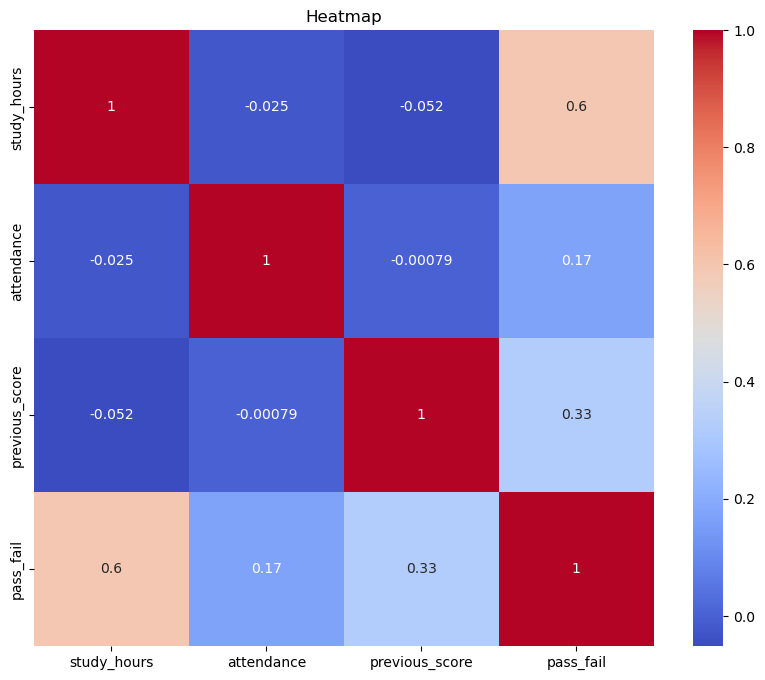

In [109]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()

In [110]:
x = df[["study_hours","attendance","previous_score"]] #Input
y = df["pass_fail"] #Output

In [111]:
#Splitting into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.2,
    random_state = 42
)

In [112]:
#Creating Model
model = LogisticRegression()

#Training the model
model.fit(x_train, y_train)

#Making predictions
y_pred = model.predict(x_test)

In [113]:
accuracy = accuracy_score(y_test, y_pred)   #How often the model was right.    
confusion = confusion_matrix(y_test, y_pred)   #More informative than accuracy.
precision = precision_score(y_test, y_pred)   #Measures reliability of PASS predictions.
recall = recall_score(y_test, y_pred)   #Measures how many real PASS cases were caught.

In [123]:
a = float(input("Enter the study hours: "))
b = float(input("Enter the attendance: "))
c = float(input("Enter the previous exam score: "))
dict = {
    "study_hours":[a],
    "attendance":[b],
    "previous_score":[c]
}
new_data = pd.DataFrame(dict)

Enter the study hours:  4
Enter the attendance:  76
Enter the previous exam score:  80


In [124]:
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)
fail_prob = probability[0][0]
pass_prob = probability[0][1]

print(f"Fail Probability: {fail_prob:.2f}")
print(f"Pass Probability: {pass_prob:.2f}")

Fail Probability: 0.04
Pass Probability: 0.96
